**Data Cleaning and Pre-Processing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Upload the selected dataset for this project
data = pd.read_csv('Major_Crime_Indicators_Open_Data.csv')

In [3]:
# Get dataset information summary
print("Dataset info:")
print(data.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372899 entries, 0 to 372898
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  372899 non-null  float64
 1   Y                  372899 non-null  float64
 2   OBJECTID           372899 non-null  int64  
 3   EVENT_UNIQUE_ID    372899 non-null  object 
 4   REPORT_DATE        372899 non-null  object 
 5   OCC_DATE           372899 non-null  object 
 6   REPORT_YEAR        372899 non-null  int64  
 7   REPORT_MONTH       372899 non-null  object 
 8   REPORT_DAY         372899 non-null  int64  
 9   REPORT_DOY         372899 non-null  int64  
 10  REPORT_DOW         372899 non-null  object 
 11  REPORT_HOUR        372899 non-null  int64  
 12  OCC_YEAR           372788 non-null  float64
 13  OCC_MONTH          372788 non-null  object 
 14  OCC_DAY            372788 non-null  float64
 15  OCC_DOY            372788 non-null  f

In [4]:
# Get dataset description
print("\nDataset description:")
print(data.describe())


Dataset description:
                  X             Y       OBJECTID    REPORT_YEAR  \
count  3.728990e+05  3.728990e+05  372899.000000  372899.000000   
mean  -8.702252e+06  5.336601e+06  186450.000000    2018.801490   
std    1.089103e+06  6.678972e+05  107646.813353       2.903585   
min   -8.865400e+06  5.664924e-09       1.000000    2014.000000   
25%   -8.846962e+06  5.412926e+06   93225.500000    2016.000000   
50%   -8.838091e+06  5.419022e+06  186450.000000    2019.000000   
75%   -8.829993e+06  5.426947e+06  279674.500000    2021.000000   
max    6.327780e-09  5.442747e+06  372899.000000    2023.000000   

          REPORT_DAY     REPORT_DOY    REPORT_HOUR       OCC_YEAR  \
count  372899.000000  372899.000000  372899.000000  372788.000000   
mean       15.748146     187.194020      12.714494    2018.743380   
std         8.769054     103.739806       6.470960       2.940644   
min         1.000000       1.000000       0.000000    2000.000000   
25%         8.000000      99.

In [5]:
# Check for duplicate rows based on the column that identifies the crime event
duplicate_rows = data[data.duplicated(subset=['EVENT_UNIQUE_ID'])]
print("Duplicate rows based on 'EVENT_UNIQUE_ID':")
print(duplicate_rows)

Duplicate rows based on 'EVENT_UNIQUE_ID':
                   X             Y  OBJECTID EVENT_UNIQUE_ID  \
11     -8.814320e+06  5.435514e+06        12  GO-20141260033   
40     -8.813613e+06  5.428591e+06        41  GO-20141260831   
42     -8.838988e+06  5.411068e+06        43  GO-20141260912   
52      6.327780e-09  5.664924e-09        53  GO-20141260577   
55     -8.809036e+06  5.431523e+06        56  GO-20141260264   
...              ...           ...       ...             ...   
372886 -8.830003e+06  5.413789e+06    372887  GO-20232992841   
372888 -8.840677e+06  5.414066e+06    372889  GO-20232992925   
372889 -8.824422e+06  5.429589e+06    372890  GO-20232988215   
372891 -8.840677e+06  5.414066e+06    372892  GO-20232992925   
372898 -8.824422e+06  5.429589e+06    372899  GO-20232987571   

                   REPORT_DATE                OCC_DATE  REPORT_YEAR  \
11      2014/01/01 05:00:00+00  2013/12/31 05:00:00+00         2014   
40      2014/01/01 05:00:00+00  2014/01/01 05:

In [6]:
# Remove duplicate rows from the dataset
data.drop_duplicates(subset = ['EVENT_UNIQUE_ID'], inplace = True)
print("Dataset after removing duplicate rows:")
print(data)

Dataset after removing duplicate rows:
                   X             Y  OBJECTID EVENT_UNIQUE_ID  \
0      -8.809036e+06  5.431523e+06         1  GO-20141260264   
1      -8.814320e+06  5.435514e+06         2  GO-20141260033   
2      -8.832825e+06  5.419631e+06         3  GO-20141259834   
3      -8.847292e+06  5.429042e+06         4  GO-20141264084   
4       6.327780e-09  5.664924e-09         5  GO-20141260577   
...              ...           ...       ...             ...   
372893 -8.849874e+06  5.425325e+06    372894  GO-20232989815   
372894 -8.832825e+06  5.419631e+06    372895  GO-20232989838   
372895 -8.838191e+06  5.415297e+06    372896  GO-20232989777   
372896 -8.851986e+06  5.429799e+06    372897  GO-20232990411   
372897 -8.832606e+06  5.429093e+06    372898  GO-20232990415   

                   REPORT_DATE                OCC_DATE  REPORT_YEAR  \
0       2014/01/01 05:00:00+00  2014/01/01 05:00:00+00         2014   
1       2014/01/01 05:00:00+00  2013/12/31 05:00:0

In [7]:
#Drop a few variables to clean up the dataset
attributes_to_drop = ['X', 'Y', 'OBJECTID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY',
                      'REPORT_DOW', 'REPORT_HOUR', 'DIVISION', 'LOCATION_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE',
                      'HOOD_140', 'NEIGHBOURHOOD_140']
data.drop(columns = attributes_to_drop, inplace = True)
print(data)

       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  \
0       GO-20141260264    2014.0   January      1.0      1.0  Wednesday    
1       GO-20141260033    2013.0  December     31.0    365.0  Tuesday      
2       GO-20141259834    2014.0   January      1.0      1.0  Wednesday    
3       GO-20141264084    2013.0  December     31.0    365.0  Tuesday      
4       GO-20141260577    2014.0   January      1.0      1.0  Wednesday    
...                ...       ...       ...      ...      ...         ...   
372893  GO-20232989815    2023.0  December     31.0    365.0  Sunday       
372894  GO-20232989838    2023.0  December     31.0    365.0  Sunday       
372895  GO-20232989777    2023.0  December     31.0    365.0  Sunday       
372896  GO-20232990411    2023.0  December     31.0    365.0  Sunday       
372897  GO-20232990415    2023.0  December     31.0    365.0  Sunday       

        OCC_HOUR PREMISES_TYPE     MCI_CATEGORY HOOD_158  \
0              1       Tran

In [8]:
# Check for missing values per column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
EVENT_UNIQUE_ID       0
OCC_YEAR             88
OCC_MONTH            88
OCC_DAY              88
OCC_DOY              88
OCC_DOW              88
OCC_HOUR              0
PREMISES_TYPE         0
MCI_CATEGORY          0
HOOD_158              0
NEIGHBOURHOOD_158     0
LONG_WGS84            0
LAT_WGS84             0
dtype: int64


In [9]:
# Since there are only a few missing values, I chose to omit them by removing rows
data.dropna(inplace=True)
print("Dataset after omitting missing values:")
print(data)

Dataset after omitting missing values:
       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  \
0       GO-20141260264    2014.0   January      1.0      1.0  Wednesday    
1       GO-20141260033    2013.0  December     31.0    365.0  Tuesday      
2       GO-20141259834    2014.0   January      1.0      1.0  Wednesday    
3       GO-20141264084    2013.0  December     31.0    365.0  Tuesday      
4       GO-20141260577    2014.0   January      1.0      1.0  Wednesday    
...                ...       ...       ...      ...      ...         ...   
372893  GO-20232989815    2023.0  December     31.0    365.0  Sunday       
372894  GO-20232989838    2023.0  December     31.0    365.0  Sunday       
372895  GO-20232989777    2023.0  December     31.0    365.0  Sunday       
372896  GO-20232990411    2023.0  December     31.0    365.0  Sunday       
372897  GO-20232990415    2023.0  December     31.0    365.0  Sunday       

        OCC_HOUR PREMISES_TYPE     MCI_CATEGORY 

In [10]:
# Drop rows containing years of crime occurrence from 2000 to 2013
drop_rows = data['OCC_YEAR'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
data.drop(data[drop_rows].index, inplace=True)
print("Dataset after dropping rows with year of crime occurrence from 2000 to 2013:")
print(data)

Dataset after dropping rows with year of crime occurrence from 2000 to 2013:
       EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  \
0       GO-20141260264    2014.0   January      1.0      1.0  Wednesday    
2       GO-20141259834    2014.0   January      1.0      1.0  Wednesday    
4       GO-20141260577    2014.0   January      1.0      1.0  Wednesday    
5       GO-20141260618    2014.0   January      1.0      1.0  Wednesday    
6       GO-20141260730    2014.0   January      1.0      1.0  Wednesday    
...                ...       ...       ...      ...      ...         ...   
372893  GO-20232989815    2023.0  December     31.0    365.0  Sunday       
372894  GO-20232989838    2023.0  December     31.0    365.0  Sunday       
372895  GO-20232989777    2023.0  December     31.0    365.0  Sunday       
372896  GO-20232990411    2023.0  December     31.0    365.0  Sunday       
372897  GO-20232990415    2023.0  December     31.0    365.0  Sunday       

        OC

In [11]:
# Check dataset info to deal with variables data type
print("Dataset info:")
print(data.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 323720 entries, 0 to 372897
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EVENT_UNIQUE_ID    323720 non-null  object 
 1   OCC_YEAR           323720 non-null  float64
 2   OCC_MONTH          323720 non-null  object 
 3   OCC_DAY            323720 non-null  float64
 4   OCC_DOY            323720 non-null  float64
 5   OCC_DOW            323720 non-null  object 
 6   OCC_HOUR           323720 non-null  int64  
 7   PREMISES_TYPE      323720 non-null  object 
 8   MCI_CATEGORY       323720 non-null  object 
 9   HOOD_158           323720 non-null  object 
 10  NEIGHBOURHOOD_158  323720 non-null  object 
 11  LONG_WGS84         323720 non-null  float64
 12  LAT_WGS84          323720 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 34.6+ MB
None


In [12]:
# Convert object type variables to category data type
object_variables = ['OCC_MONTH', 'OCC_DOW', 'PREMISES_TYPE', 'MCI_CATEGORY']
for column in object_variables:
    data[column] = data[column].astype('category')

# Convert float type variables to integer data type
float_variables = ['OCC_YEAR', 'OCC_DAY', 'OCC_DOY']
for column1 in float_variables:
    data[column1] = data[column1].astype(int)

print(data.dtypes)

EVENT_UNIQUE_ID        object
OCC_YEAR                int64
OCC_MONTH            category
OCC_DAY                 int64
OCC_DOY                 int64
OCC_DOW              category
OCC_HOUR                int64
PREMISES_TYPE        category
MCI_CATEGORY         category
HOOD_158               object
NEIGHBOURHOOD_158      object
LONG_WGS84            float64
LAT_WGS84             float64
dtype: object


**Preliminar Analysis**

In [13]:
# Count crime occurrences per year and per type of crime
crime_count_table = data.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)
#crime_count_table.loc['Total'] = crime_count_table.sum()
crime_count_table['Total'] = crime_count_table.sum(axis=1)
print(crime_count_table)

MCI_CATEGORY  Assault  Auto Theft  Break and Enter  Robbery  Theft Over  Total
OCC_YEAR                                                                      
2014            14080        3462             7101     2911         999  28553
2015            14942        3068             6817     2763        1016  28606
2016            15793        3029             6262     2918        1012  29014
2017            16225        3324             6780     3109        1158  30596
2018            16727        4268             7503     2965        1257  32720
2019            17645        4782             8412     2848        1324  35011
2020            15473        5113             6816     2133        1167  30702
2021            16138        5900             5545     1727        1043  30353
2022            18043        8714             5868     2125        1374  36124
2023            20018       10912             7217     2335        1559  42041


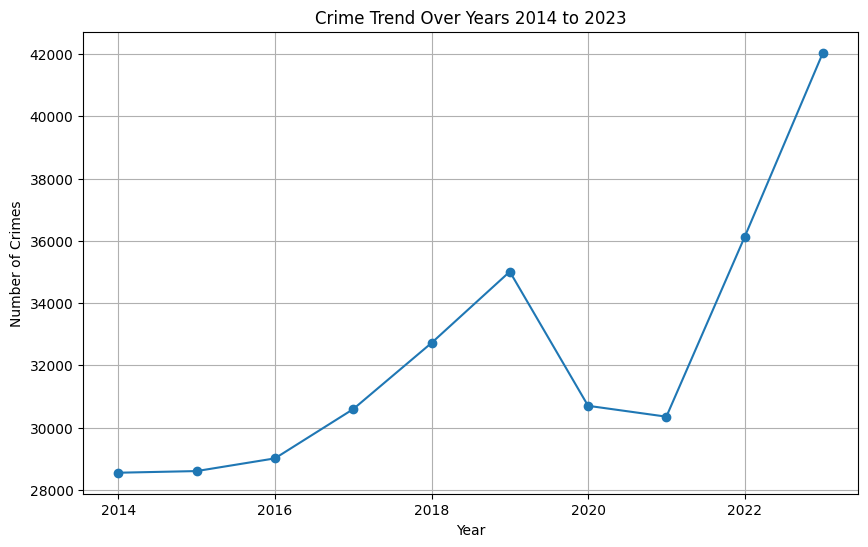

In [14]:
# Plot the crime trend over years
crime_trend = data.groupby('OCC_YEAR').size()
plt.figure(figsize=(10, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
plt.title('Crime Trend Over Years 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

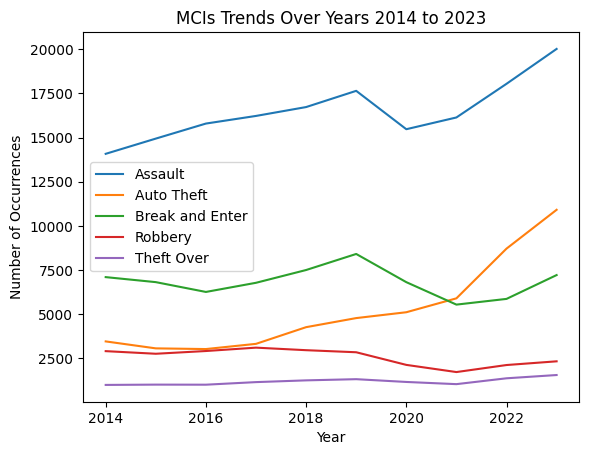

In [15]:
# Plot crime trends for each Major Crime Indicator category
trend_data = data.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)
for category in trend_data.columns:
    plt.plot(trend_data.index, trend_data[category], label=category)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('MCIs Trends Over Years 2014 to 2023')
plt.legend(loc='center left')
plt.show()

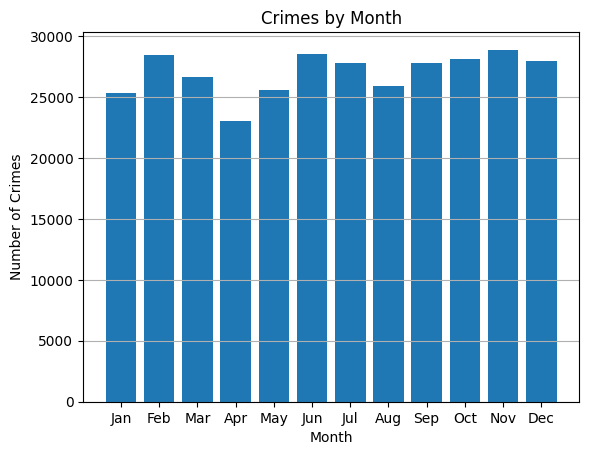

In [16]:
# Bar Plot showing crimes by month
crime_count_per_month = data.groupby('OCC_MONTH').size()
plt.bar(range(1, 13), crime_count_per_month.values)
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Month')
plt.grid(axis='y')
plt.show()

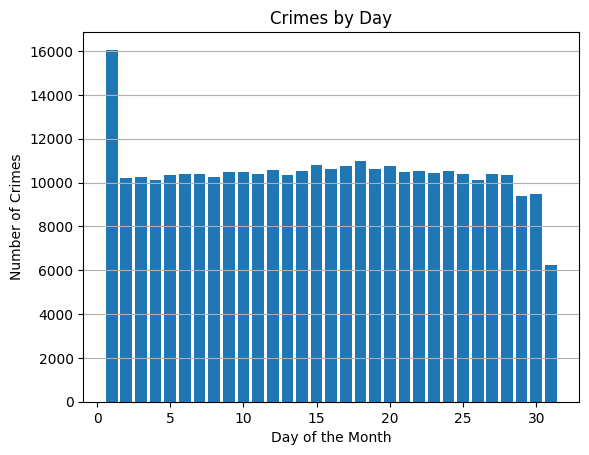

In [17]:
# Bar Plot showing crimes by day
crime_count_per_day = data.groupby('OCC_DAY').size()
plt.bar(crime_count_per_day.index, crime_count_per_day.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Day')
plt.grid(axis='y')
plt.show()

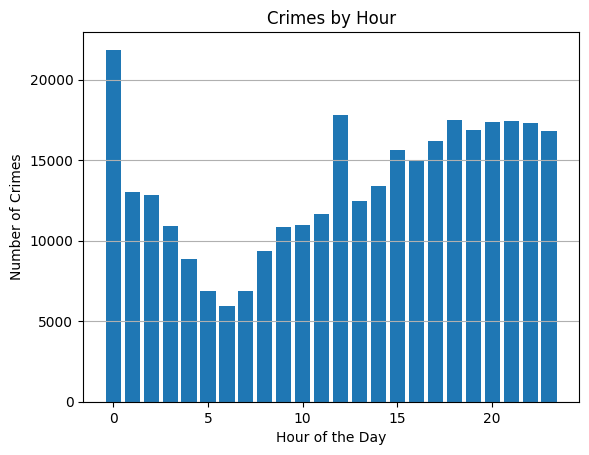

In [18]:
# Bar Plot showing crimes by hour
crime_count_per_hour = data.groupby('OCC_HOUR').size()
plt.bar(crime_count_per_hour.index, crime_count_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Hour')
plt.grid(axis='y')
plt.show()

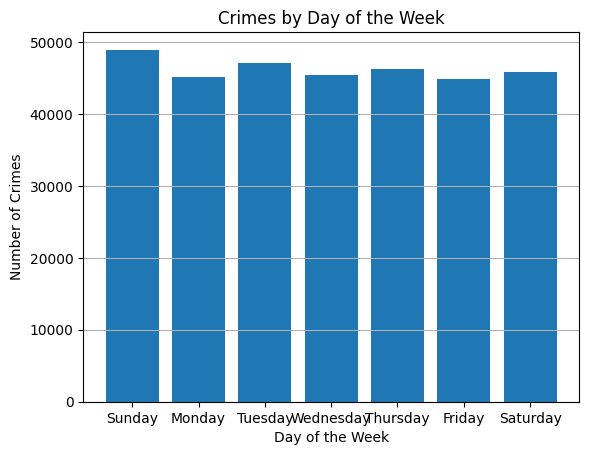

In [19]:
# Bar plot showing crimes by day of the week
crime_count_per_day_of_week = data.groupby('OCC_DOW').size()
days_of_week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(crime_count_per_day_of_week.index, crime_count_per_day_of_week.values, tick_label=days_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Day of the Week')
plt.grid(axis='y')
plt.show()

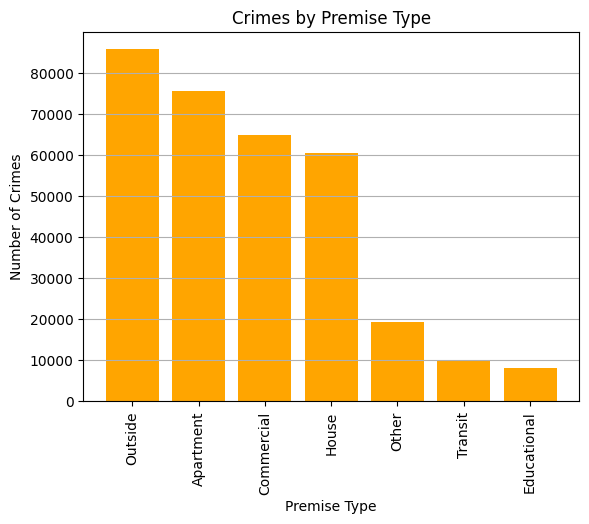

In [20]:
# Bar plot for crimes by premises type
crime_count_per_premise_type = data['PREMISES_TYPE'].value_counts()
plt.bar(crime_count_per_premise_type.index, crime_count_per_premise_type.values, color='orange')
plt.xlabel('Premise Type')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Premise Type')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

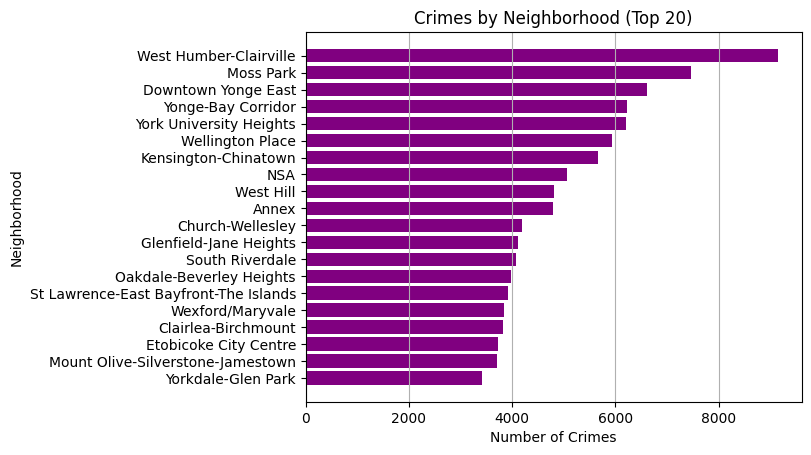

In [21]:
# Most dangerous neighborhoods (Top 20)
crime_count_per_neighborhood = data['NEIGHBOURHOOD_158'].value_counts()
top_20_neighborhoods = crime_count_per_neighborhood.head(20)
plt.barh(top_20_neighborhoods.index, top_20_neighborhoods.values, color='purple')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Top 20)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

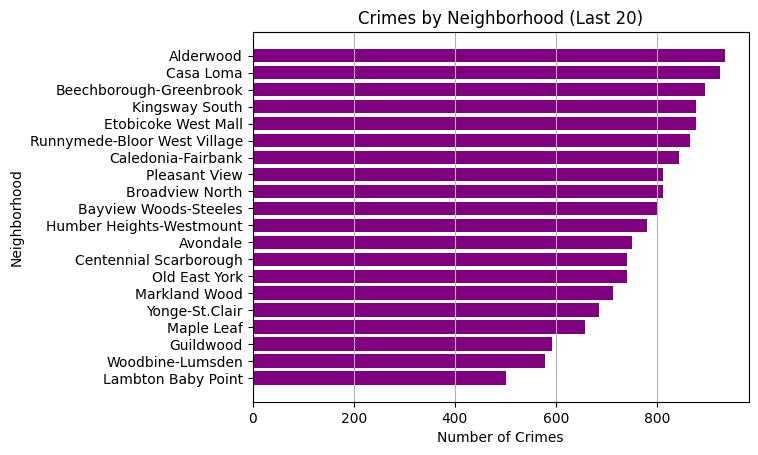

In [22]:
# Least dangerous neighborhood (Last 20)
crime_count_per_neighborhood = data['NEIGHBOURHOOD_158'].value_counts()
last_20_neighborhoods = crime_count_per_neighborhood.tail(20)
plt.barh(last_20_neighborhoods.index, last_20_neighborhoods.values, color='purple')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Last 20)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

**Feature Selection**

In [23]:
# Set the seed for reproducibility
seed = 123
# Split the data into training set (70%) and test set (30%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=seed)
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (226604, 13)
Test set shape: (97116, 13)


In [24]:
# Prepare data for feature selection using gain information technique
# Create label encoder for problematic column names
problematic_columns = ['EVENT_UNIQUE_ID', 'OCC_MONTH', 'OCC_DOW', 'PREMISES_TYPE', 'HOOD_158', 'NEIGHBOURHOOD_158']
label_encoder = LabelEncoder()
for column in problematic_columns:   # Encode each problematic column
    train_data[column] = label_encoder.fit_transform(train_data[column])

In [25]:
# Prepare data for feature selection using gain information technique
# Create label encoder for problematic column names
problematic_columns = ['EVENT_UNIQUE_ID', 'OCC_MONTH', 'OCC_DOW', 'PREMISES_TYPE', 'HOOD_158', 'NEIGHBOURHOOD_158']
label_encoder = LabelEncoder()
for column in problematic_columns:   # Encode each problematic column
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [26]:
# Feature selection using gain information technique applying to training set
target = train_data['MCI_CATEGORY']
train_features = train_data.drop(columns=['MCI_CATEGORY'])  # Drop the target variable from the training set
info_gain = mutual_info_classif(train_features, target)     # Calculate information gain for each feature
feature_info_gain = dict(zip(train_features.columns, info_gain))  # Create a dictionary mapping feature names to their information gain values
sorted_features = sorted(feature_info_gain.items(), key=lambda x: x[1], reverse=True)  # Sort features based on information gain (highest to lowest)
top_features = sorted_features[:13]  # top features and their information gain values
for feature, gain in top_features:
    print(f"Feature: {feature}, Information Gain: {gain}")

Feature: PREMISES_TYPE, Information Gain: 0.1952641509605315
Feature: LAT_WGS84, Information Gain: 0.1682586359584346
Feature: LONG_WGS84, Information Gain: 0.16751522399836682
Feature: EVENT_UNIQUE_ID, Information Gain: 0.07680656052264512
Feature: HOOD_158, Information Gain: 0.06002304318757101
Feature: NEIGHBOURHOOD_158, Information Gain: 0.05947546035589868
Feature: OCC_HOUR, Information Gain: 0.03130530484832672
Feature: OCC_YEAR, Information Gain: 0.01768235925563655
Feature: OCC_DOW, Information Gain: 0.0045365332801594604
Feature: OCC_DOY, Information Gain: 0.004055522221418251
Feature: OCC_DAY, Information Gain: 0.00231827497190773
Feature: OCC_MONTH, Information Gain: 0.001681547031164854


In [27]:
# Feature selection using gain information technique applying to test set
target_test = test_data['MCI_CATEGORY']
test_features = test_data.drop(columns=['MCI_CATEGORY'])  # Drop the target variable from the training set
test_info_gain = mutual_info_classif(test_features, target_test)     # Calculate information gain for each feature
test_feature_info_gain = dict(zip(test_features.columns, test_info_gain))  # Create a dictionary mapping feature names to their information gain values
test_sorted_features = sorted(test_feature_info_gain.items(), key=lambda x: x[1], reverse=True)  # Sort features based on information gain (highest to lowest)
test_top_features = test_sorted_features[:13]  # top features and their information gain values
for test_feature, test_gain in test_top_features:
    print(f"Feature: {test_feature}, Information Gain: {test_gain}")

Feature: PREMISES_TYPE, Information Gain: 0.19223588315757834
Feature: LONG_WGS84, Information Gain: 0.14533232622902004
Feature: LAT_WGS84, Information Gain: 0.14260613326002192
Feature: EVENT_UNIQUE_ID, Information Gain: 0.0615964585163149
Feature: NEIGHBOURHOOD_158, Information Gain: 0.060293076097311715
Feature: HOOD_158, Information Gain: 0.05758385714610226
Feature: OCC_HOUR, Information Gain: 0.02908179965388591
Feature: OCC_YEAR, Information Gain: 0.01385623755996468
Feature: OCC_DOY, Information Gain: 0.0037585310087377977
Feature: OCC_DAY, Information Gain: 0.0018879516724918943
Feature: OCC_DOW, Information Gain: 0.0010780052923760053
Feature: OCC_MONTH, Information Gain: 0.0


In [28]:
# Check if the training set is imbalanced, calculate the class distribution of the MCI variable.
class_distribution = train_data['MCI_CATEGORY'].value_counts()
print("Class Distribution:")
print(class_distribution)

if len(class_distribution) == 1:
    print("The dataset is imbalanced as it contains only one class.")
elif len(class_distribution) == 2:
    ratio = class_distribution.min() / class_distribution.max()
    if ratio < 0.2:  # the threshold was calculated by 1/5 classes
        print("The dataset is imbalanced as the class distribution ratio is less than 0.2.")
    else:
        print("The dataset is balanced.")
else:
    print("The dataset has more than two classes.")

Class Distribution:
Assault            115506
Break and Enter     47852
Auto Theft          36807
Robbery             18076
Theft Over           8363
Name: MCI_CATEGORY, dtype: int64
The dataset has more than two classes.


In [29]:
# Check if the test set is imbalanced, calculate the class distribution of the MCI variable.
test_class_distribution = test_data['MCI_CATEGORY'].value_counts()
print("Class Distribution:")
print(class_distribution)

if len(test_class_distribution) == 1:
    print("The dataset is imbalanced as it contains only one class.")
elif len(test_class_distribution) == 2:
    test_ratio = test_class_distribution.min() / test_class_distribution.max()
    if test_ratio < 0.2:  # the threshold was calculated by 1/5 classes
        print("The dataset is imbalanced as the class distribution ratio is less than 0.2.")
    else:
        print("The dataset is balanced.")
else:
    print("The dataset has more than two classes.")

Class Distribution:
Assault            115506
Break and Enter     47852
Auto Theft          36807
Robbery             18076
Theft Over           8363
Name: MCI_CATEGORY, dtype: int64
The dataset has more than two classes.


In [30]:
# Apply synthetic minority oversampling technique (Smote)
# Apply Smote to the training set assuming that 'X_train' has the feature matrix
# of the training set and 'y_train' contains the corresponding MCI classes
X_train = train_data.drop(columns=['MCI_CATEGORY'])
y_train = train_data['MCI_CATEGORY']
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
# Apply synthetic minority oversampling technique (Smote)
# Apply Smote to the training set assuming that 'X_test' has the feature matrix
# of the training set and 'y_test' contains the corresponding MCI classes
X_test = test_data.drop(columns=['MCI_CATEGORY'])
y_test = test_data['MCI_CATEGORY']
test_smote = SMOTE(random_state=123)
X_test_resampled, y_test_resampled = test_smote.fit_resample(X_test, y_test)

In [32]:
# Class distribution of the new balanced set
print("New Class Distribution")
print(y_train_resampled.value_counts())

New Class Distribution
Assault            115506
Auto Theft         115506
Break and Enter    115506
Robbery            115506
Theft Over         115506
Name: MCI_CATEGORY, dtype: int64


**Model Implementation**

In [36]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=123)

# Fit the classifier to the balanced training set
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the balanced training set
y_pred_train = dt_classifier.predict(X_train_resampled)

# Print classification report and confusion matrix
print("Classification Report on Balanced Training Set:")
print(classification_report(y_train_resampled, y_pred_train))

print("Confusion Matrix on Balanced Training Set:")
print(confusion_matrix(y_train_resampled, y_pred_train))

Classification Report on Balanced Training Set:
                 precision    recall  f1-score   support

        Assault       1.00      1.00      1.00    115506
     Auto Theft       1.00      1.00      1.00    115506
Break and Enter       1.00      1.00      1.00    115506
        Robbery       1.00      1.00      1.00    115506
     Theft Over       1.00      1.00      1.00    115506

       accuracy                           1.00    577530
      macro avg       1.00      1.00      1.00    577530
   weighted avg       1.00      1.00      1.00    577530

Confusion Matrix on Balanced Training Set:
[[115506      0      0      0      0]
 [     0 115506      0      0      0]
 [     0      0 115506      0      0]
 [     0      0      0 115506      0]
 [     0      0      0      0 115506]]
